# Should States Continue with Lockdowns and Other Covid Restrictions?
## What we have learned from the 4 largest states over the Pandemic (2020-2021)

**Population from 2020 Census**
<br>California: 39,538,223
<br>Texas: 29,145,505
<br>Florida: 21,538,187
<br>New York: 20,201,249

**Total Number of Covid Deaths from CDC (2020-2021)**
<br>California: 78,297
<br>Texas: 78,986
<br>Florida: 59,441
<br>New York: 59,692

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Per Capita Covid Deaths

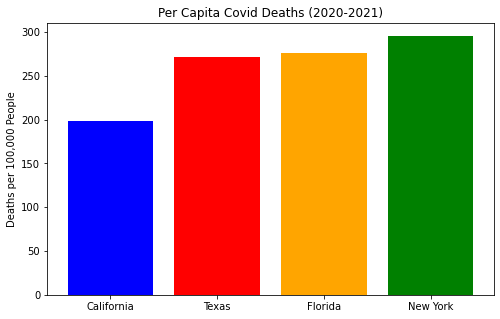

In [2]:
# Make bar graph of Covid deaths per 100,000 for each state
# Data is from CDC and manually inputted into lists for graphing

plt.figure(figsize = (8,5))
x = ['California', 'Texas', 'Florida', 'New York']
h = [198.02, 271.01, 275.98, 295.49]
c = ['blue', 'red', 'orange', 'green']
plt.bar(x,h, color = c)
plt.title('Per Capita Covid Deaths (2020-2021)')
plt.ylabel("Deaths per 100,000 People")
plt.show()

# Covid Deaths in People Over 65 Years

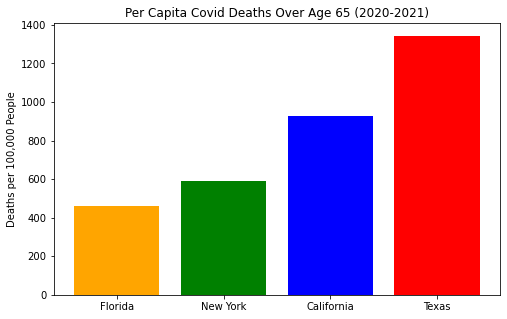

In [3]:
# Make bar graph of Covid deaths per 100,000 in people over 65 years old for each state
# Data is from CDC and manually inputted into lists for graphing
plt.figure(figsize = (8,5))
x = ['Florida', 'New York', 'California', 'Texas']
h = [462.8, 590.7, 928.6, 1342.6]
c = ['orange', 'green', 'blue', 'red']
plt.bar(x,h, color = c)
plt.title('Per Capita Covid Deaths Over Age 65 (2020-2021)')
plt.ylabel("Deaths per 100,000 People")
plt.show()

# Percent Covid Death

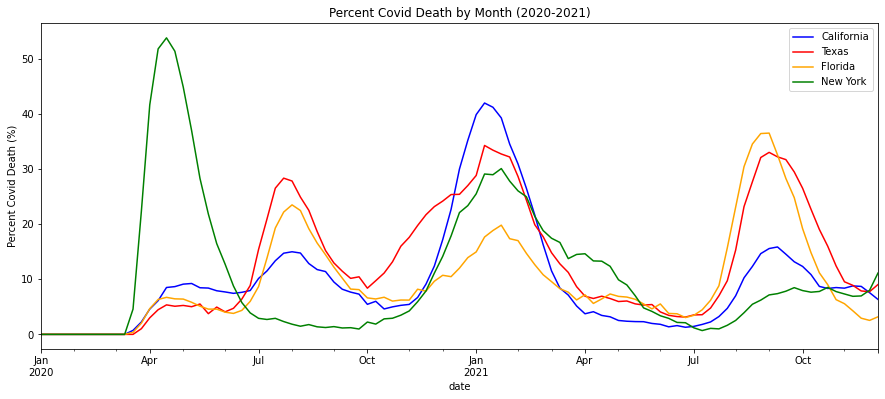

In [4]:
# Use api from CDC to get data and calculate percent Covid death for each state
# https://data.cdc.gov/NCHS/Weekly-Provisional-Counts-of-Deaths-by-State-and-S/muzy-jte6
       
def get_data_for_state(state_url):
    '''
    Get data from cdc api for each state with the url for specified state
    return pandas data frame 
    '''
    try: 
        State_data = requests.get(state_url)
    except Exception as e:
        print("There was an error getting the data: ", e)
    else:    
        if State_data.status_code == 200:
            json_data = json.loads(State_data.text)
            state_df = pd.DataFrame(json_data)
            return state_df
        else:
            print("Status code is not 200")
            
def clean_data_for_state(state_url):   
    '''
    Remove unncessary columns
    Set missing values equal to 0
    Format variables
    '''
    state_df = get_data_for_state(state_url)
    state_df.drop(['flag_cov19ucod', 'flag_cov19mcod',  'covid_19_u071_multiple_cause_of_death', 'cerebrovascular_diseases', 'diseases_of_heart_i00_i09', 
                     'symptoms_signs_and_abnormal','nephritis_nephrotic_syndrome', 'other_diseases_of_respiratory', 'chronic_lower_respiratory', 'diabetes_mellitus_e10_e14', 
                     'malignant_neoplasms_c00_c97', 'septicemia_a40_a41', 'natural_cause', 'alzheimer_disease_g30', 'influenza_and_pneumonia_j09_j18'], axis = 1, inplace = True)    
    # change missing covid death values to 0
    state_df['covid_19_u071_underlying_cause_of_death'] = state_df['covid_19_u071_underlying_cause_of_death'].fillna(0)
    # convert columns to numeric
    state_df['covid_19_u071_underlying_cause_of_death'] = pd.to_numeric(state_df['covid_19_u071_underlying_cause_of_death'])
    state_df['all_cause'] = pd.to_numeric(state_df['all_cause'])
    # format date column
    state_df['date'] = pd.to_datetime(state_df['week_ending_date'])
    state_df.set_index("date", inplace = True)
    
    # calculate percent covid death variable (covid death/total death * 100)
    state_df['percent_covid_death'] = (state_df['covid_19_u071_underlying_cause_of_death'] / state_df['all_cause']) * 100
    # return the cleaned data frame
    return state_df    

# State url links 
Florida_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=Florida"
California_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=California"
Texas_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=Texas"
NewYork_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=New York"
NewYorkCity_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=New York City"

# Get data for states
Florida = clean_data_for_state(Florida_url)
California = clean_data_for_state(California_url)
Texas = clean_data_for_state(Texas_url)

# Merge NY and NYC data
NewYorkState = clean_data_for_state(NewYork_url)
NewYorkCity = clean_data_for_state(NewYorkCity_url)
NewYork = pd.merge(NewYorkState, NewYorkCity, on = 'date')
NewYork['all_cause'] = (NewYork['all_cause_x'] + NewYork['all_cause_y'])
NewYork['covid_19_u071_underlying_cause_of_death'] = (NewYork['covid_19_u071_underlying_cause_of_death_x'] + NewYork['covid_19_u071_underlying_cause_of_death_y'])
NewYork['percent_covid_death'] = (NewYork['covid_19_u071_underlying_cause_of_death'] / NewYork['all_cause']) * 100

# Plot Percent Cvid Death by state
plt.figure(figsize = (15,6))
plt.title("Percent Covid Death by Month (2020-2021)")
plt.ylabel("Percent Covid Death (%)")
California["percent_covid_death"].plot(color = 'blue', label = "California")
Texas["percent_covid_death"].plot(color = 'red', label = "Texas")
Florida["percent_covid_death"].plot(color = 'orange', label = "Florida")
NewYork["percent_covid_death"].plot(color = 'green', label = "New York")
plt.legend()

# Unemployment

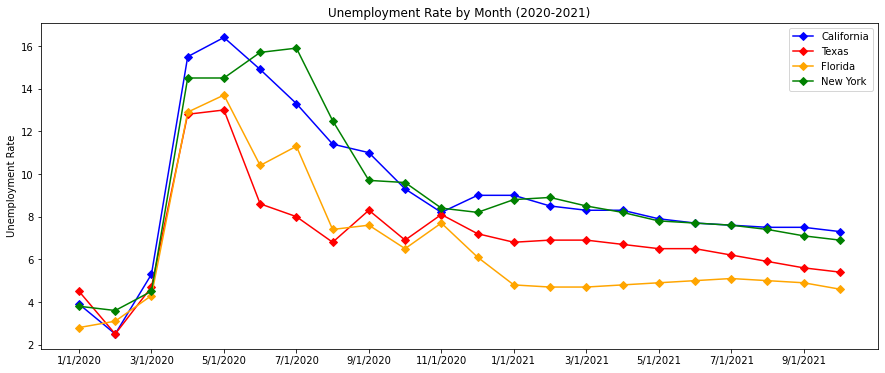

In [5]:
# Create pandas data frame from csv with data on unemployment rates per month 2020-2021 for each state
# https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx
df = pd.read_csv("State_unemployment.csv") 
df['date'] = pd.to_datetime(df['Date'])

# Make seperate data frames for each state
California = (df[(df['State'] == 'California')])  
Texas = (df[(df['State'] == 'Texas')]) 
Florida = (df[(df['State'] == 'Florida')]) 
NewYork = (df[(df['State'] == 'New York')]) 

# Create figure of Unemployment Rate by Month for each state
plt.figure(figsize = (15,6))
plt.title("Unemployment Rate by Month (2020-2021)")
plt.ylabel('Unemployment Rate')
x = California['Date']
y = California['Unemployment']
x2 = Texas['Date']
y2 = Texas['Unemployment']
x3 = Florida['Date']
y3 = Florida['Unemployment']
x4 = NewYork['Date']
y4 = NewYork['Unemployment']
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.plot(x, y, marker = 'D', color = 'blue', label = "California")
plt.plot(x2, y2, marker = 'D', color = 'red', label = "Texas")
plt.plot(x3, y3, marker = 'D', color = 'orange', label = "Florida")
plt.plot(x4, y4, marker = 'D', color = 'green', label = "New York")
plt.legend()
plt.show()

# Cost of Living

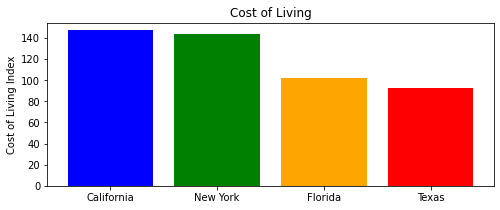

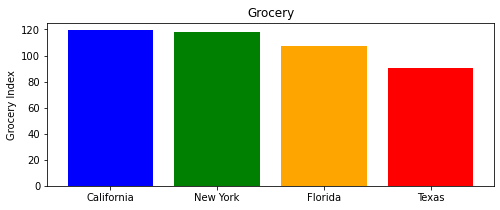

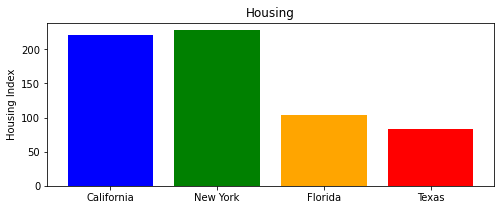

In [6]:
# Data is manually inputted into lists for graphing
# https://meric.mo.gov/data/cost-living-data-series

# Cost of Living Index
plt.figure(figsize = (8,3))
x = ['California', 'New York', 'Florida', 'Texas']
h = [146.9, 143.7, 101.5, 92.6]
c = ['blue', 'green', 'orange', 'red']
plt.bar(x,h, color = c)
plt.title('Cost of Living')
plt.ylabel("Cost of Living Index")
plt.show()

# Grocery
plt.figure(figsize = (8,3))
x = ['California', 'New York', 'Florida', 'Texas']
h = [119.2, 117.9, 107.6, 90.5]
c = ['blue', 'green', 'orange', 'red']
plt.bar(x,h, color = c)
plt.title('Grocery')
plt.ylabel("Grocery Index")
plt.show()

# Housing
plt.figure(figsize = (8,3))
x = ['California', 'New York', 'Florida', 'Texas']
h = [221, 227.5, 104.1, 83.9]
c = ['blue', 'green', 'orange', 'red']
plt.bar(x,h, color = c)
plt.title('Housing')
plt.ylabel("Housing Index")
plt.show()

# Gas Prices

In [7]:
# Scrape gas prices from website and then put into database
# https://www.gasbuddy.com/usa
import sqlite3
from bs4 import BeautifulSoup
import requests

# get data from website
url_gas = "https://www.gasbuddy.com/usa"
result_gas = requests.get(url_gas)
doc_gas = BeautifulSoup(result_gas.text, "html.parser")

# find state names and gas prices
state = doc_gas.find_all('div', attrs={'class':'col-sm-6 col-xs-6 siteName'})
price_state = doc_gas.find_all('div', attrs={'class':'col-sm-2 col-xs-3 text-right'})

# create list of states
list_of_states = []
for i in range(len(state)):
    state_name = state[i].text
    state_name = state_name.lstrip('\r\n ') 
    state_name = state_name.rstrip('\r\n ') 
    list_of_states.append(state_name)

# create list of gas prices
list_of_prices_states = []
for i in range(len(price_state)):
    price_for_state = price_state[i].text
    price_for_state = price_for_state.lstrip('\r\n ') 
    price_for_state = price_for_state.rstrip('\r\n ') 
    price_for_state = float(price_for_state)
    list_of_prices_states.append(price_for_state)

# Make a list with state and gas price    
state_price = []    
for i in range(len(list_of_states)):
    combined =  [list_of_states[i], list_of_prices_states[i]]
    state_price.append(combined)

# Insert data into a data base 
conn = sqlite3.connect('gasprices.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS gasprices (
            state text,
            price integer)''')
c.executemany("INSERT OR IGNORE INTO gasprices VALUES (?, ?)", state_price)
conn.commit()
conn.close()

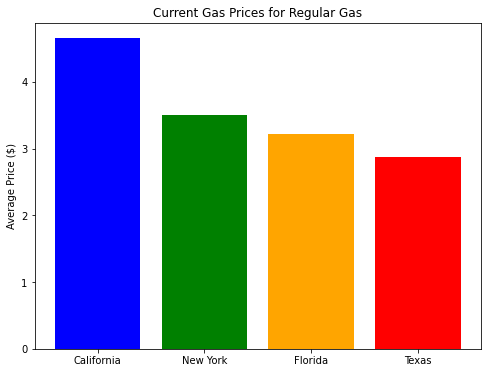

In [8]:
# Pull data out of data into pandas data frame
conn = sqlite3.connect('gasprices.db')

# Get data from 4 states
sql = """ SELECT * FROM gasprices WHERE state == 'California' OR state == 'Texas' OR state == 'Florida' OR state == 'New York' """
gas_by_state_df = pd.read_sql(sql, conn)
gas_by_state_df

# sort values
gas_by_state_df = gas_by_state_df.sort_values('price', ascending=False) 

# Make bar graph of average gas prices for each state
plt.figure(figsize = (8,6))
x = gas_by_state_df['state']
h = gas_by_state_df['price']
c = ['blue', 'green', 'orange', 'red']
plt.bar(x,h, color = c)
plt.title('Current Gas Prices for Regular Gas')
plt.ylabel("Average Price ($)")
plt.show()